In [2]:
__author__ 		= "Lekan Molu"
__copyright__ 	= "2021, Hamilton-Jacobi Analysis in Python"
__license__ 	= "Molux Licence"
__maintainer__ 	= "Lekan Molu"
__email__ 		= "patlekno@icloud.com"
__status__ 		= "Completed"

import matplotlib.pyplot as plt
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
import mpl_toolkits.mplot3d 
import numpy as np
import os, sys
from os.path import abspath, dirname, exists, join
# sys.path.append('../')
sys.path.append(abspath(join('../..')))

from LevelSetPy.Grids import createGrid
from LevelSetPy.InitialConditions import *
from LevelSetPy.Visualization.mesh_implicit import implicit_mesh

In [2]:

base_path = "/opt/LevPy/"
def get_grid():

	g3min = -5*np.ones((3, 1),dtype=np.float64); g3min[-1, 0] = -np.pi
	g3max = +5*np.ones((3, 1),dtype=np.float64); g3max[-1, 0] = np.pi
	g3N = 51*np.ones((3, 1),dtype=np.int64)
	g3 = createGrid(g3min, g3max, g3N, process=True)

	return g3

In [3]:
def show_mesh(g3, mesh, fontdict, savename, title="Cylinder", \
                fc='olivedrab', elev=0., azim=0.):
    spacing = tuple(g3.dx.flatten().tolist())
        
    fig = plt.figure(figsize=(25, 9))
    ax2 = fig.add_subplot(111, projection='3d')
    ax2.add_collection3d(mesh.mesh)
    ax2.view_init(elev=elev, azim=azim)

    xlim = (mesh.verts[:, 0].min(), mesh.verts[:,0].max())
    ylim = (mesh.verts[:, 1].min(), mesh.verts[:,1].max())
    zlim = (mesh.verts[:, 2].min(), mesh.verts[:,2].max())

    ax2.set_xlim3d(*xlim)
    ax2.set_ylim3d(*ylim)
    ax2.set_zlim3d(*zlim)
    
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])
    
    plt.tight_layout()
    if savename:
        savepath = join(base_path, "Grids")
        os.makedirs(savepath) if not os.path.exists(savepath) else None
        fig.savefig(join(savepath, savename), bbox_inches='tight',facecolor='None')
    plt.show()

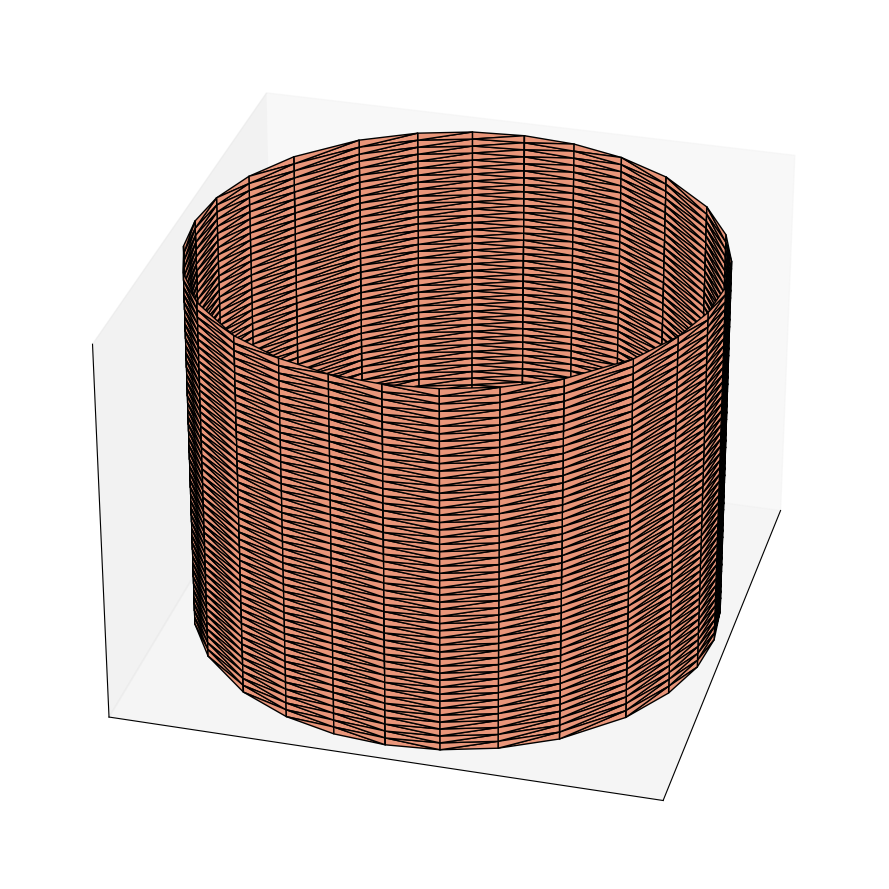

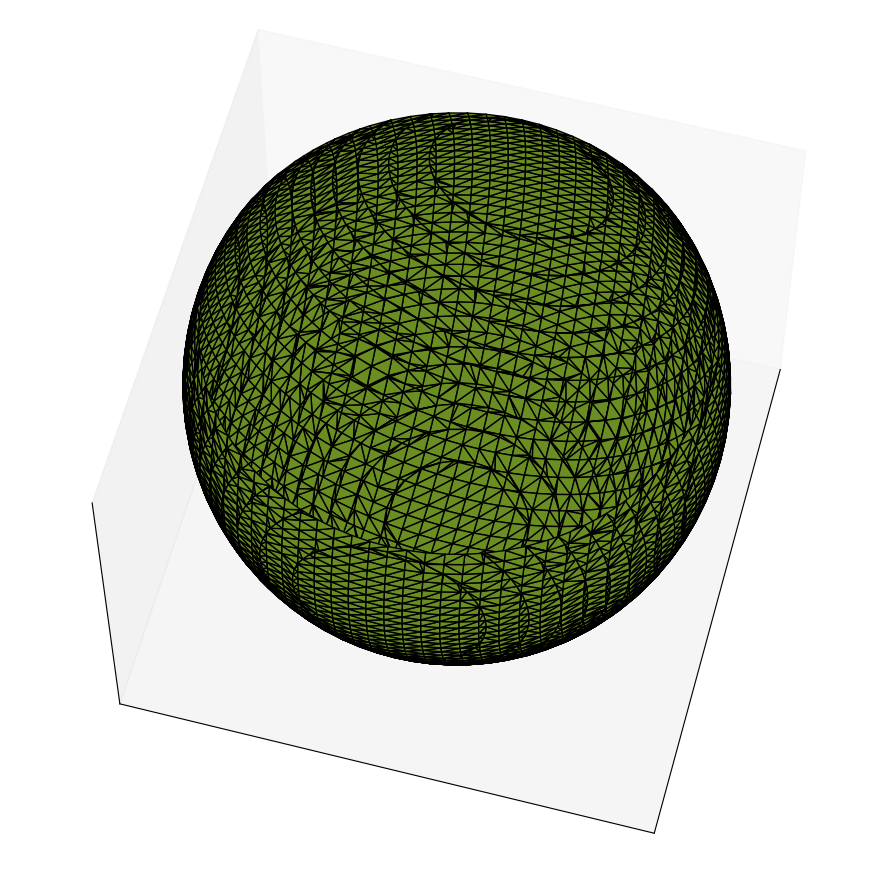

In [4]:
g3 = get_grid()
spacing = tuple(g3.dx.flatten().tolist())
center = 2*np.ones((3, 1), np.float64)

cylinder = shapeCylinder(g3, axis_align=2, center=center, radius=1.)
cyl_mesh = implicit_mesh(cylinder, level=0., spacing=spacing, face_color='darksalmon')

sphere = shapeSphere(g3, center, radius=3)
sphere_mesh = implicit_mesh(sphere, level=0., spacing=spacing, face_color='olivedrab')

fontdict = {"fontsize": 18, "fontweight": "bold"}
show_mesh(g3, cyl_mesh, fontdict, title="Cylinder", savename="cylinder.jpeg", fc='olivedrab',  elev=30., azim=15.)
show_mesh(g3, sphere_mesh, fontdict, title="Sphere", savename="sphere.jpeg", fc='olivedrab',  elev=60., azim=15.)

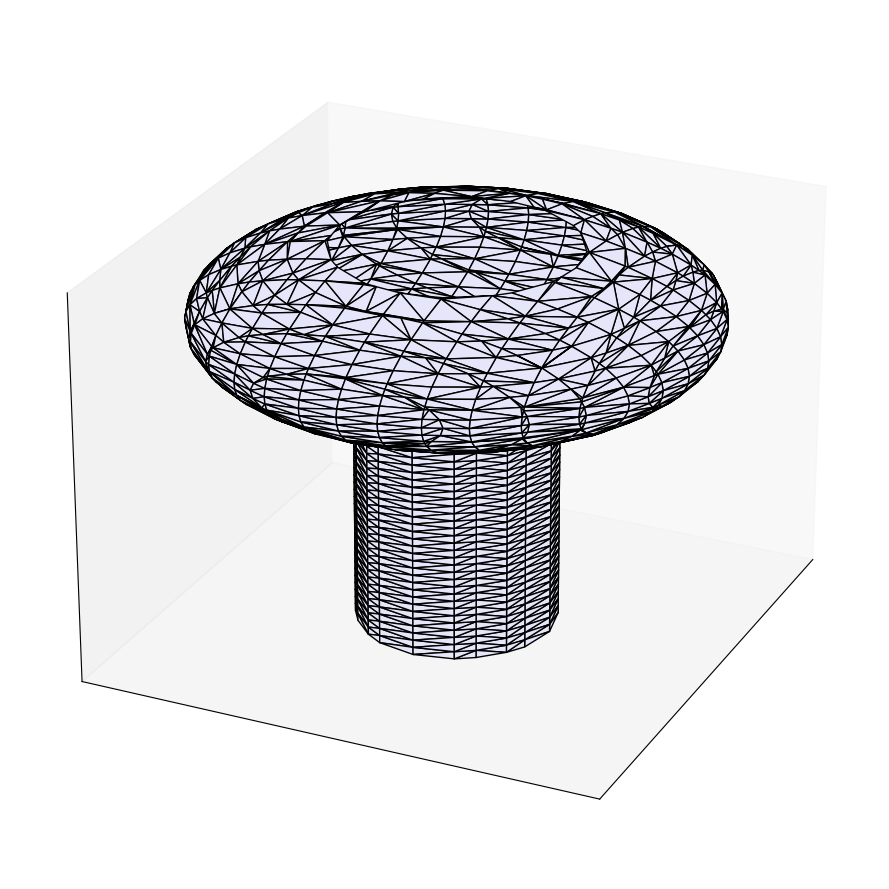

In [5]:
cylinder = shapeCylinder(g3, axis_align=2, center=center, radius=0.5)
sphere = shapeSphere(g3, center, radius=1.3)
cyl_sph_union = np.minimum(cylinder, sphere)
cyl_sph_union_mesh = implicit_mesh(cyl_sph_union, level=0., spacing=spacing, face_color='lavender')
show_mesh(g3, cyl_sph_union_mesh, fontdict, title="Sphere and Cylinder Union", savename="sphere_cyl_union.jpeg", fc='olivedrab',  elev=25., azim=25.)

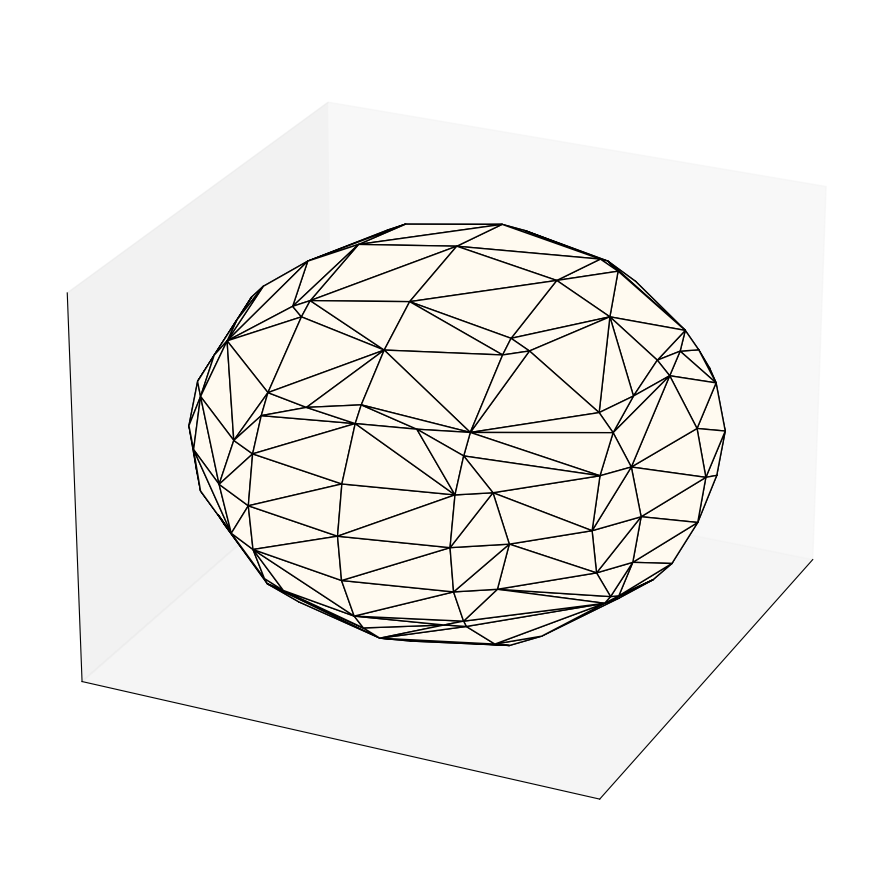

In [6]:
cylinder = shapeCylinder(g3, axis_align=2, center=center, radius=0.5)
sphere = shapeSphere(g3, center, radius=0.5)
cyl_sph_union = shapeIntersection(cylinder, sphere)
cyl_sph_union_mesh = implicit_mesh(cyl_sph_union, level=0., spacing=spacing, face_color='floralwhite')
show_mesh(g3, cyl_sph_union_mesh, fontdict, title="Sphere and Cylinder Intersection", savename="sphere_cyl_intersect.jpeg", fc='olivedrab',  elev=25., azim=25.)

In [8]:
# cylinder = shapeCylinder(g3, axis_align=2, center=center, radius=1.)
# sphere = shapeSphere(g3, center, radius=1.4)
# cyl_sph_diff= shapeDifference(cylinder, sphere)
# cyl_sph_diff_mesh = implicit_mesh(cyl_sph_diff, level=0., spacing=spacing, face_color='gold')
# show_mesh(g3, cyl_sph_diff_mesh, fontdict, title="Sphere - Cylinder", savename="sphere_cyl_diff.jpeg", fc='olivedrab',  elev=25., azim=25.)

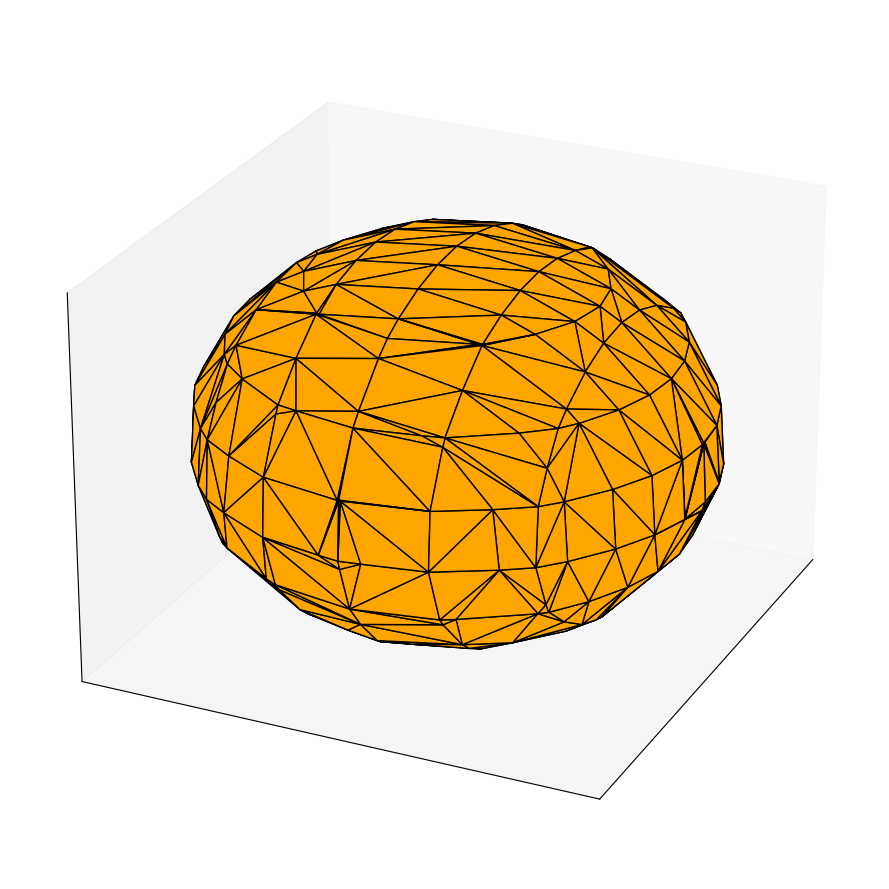

In [9]:
center = .8*np.ones((3, 1), np.float64)
ellipsoid = shapeEllipsoid(g3, center, 1.50)
ellipsoid_mesh = implicit_mesh(ellipsoid, level=0., spacing=spacing, face_color='orange')
show_mesh(g3, ellipsoid_mesh, fontdict, title="Ellipsoid", savename="ellipsoid.jpeg", fc='olivedrab',  elev=25., azim=25.)

In [ ]:
center = .8*np.ones((3, 1), np.float64)
cube = shapeCube(g3, center, 1.50)
cube_mesh = implicit_mesh(cube, level=0., spacing=spacing, face_color='orange')
show_mesh(g3, cube_mesh, fontdict, title="cube", savename="cube.jpeg", fc='olivedrab',  elev=25., azim=25.)

NameError: name 'savepath' is not defined

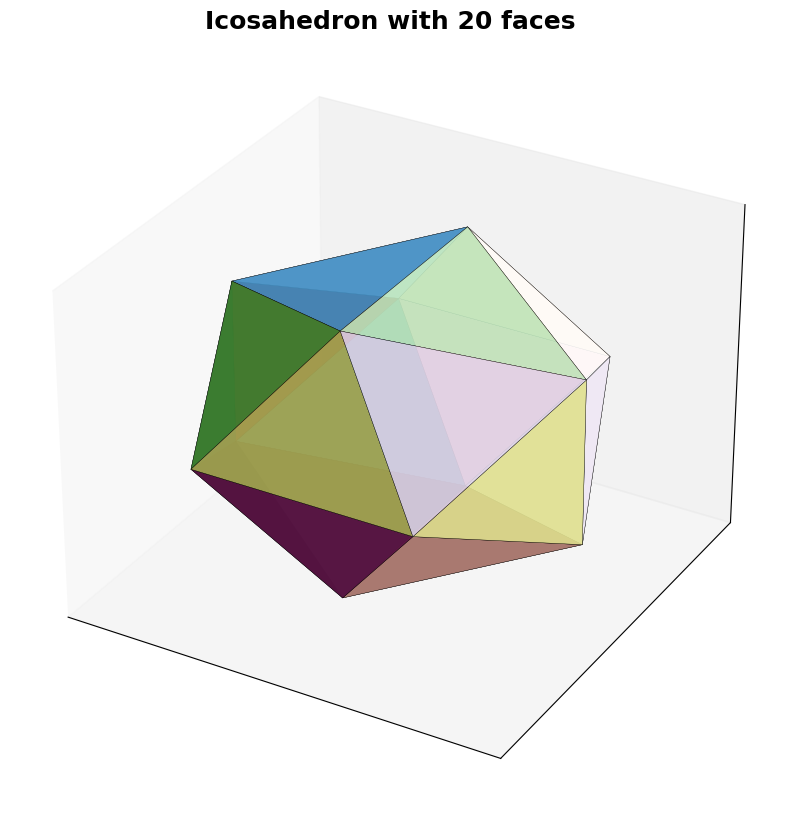

In [14]:
def icosahedron():
    '''' Regular unit icosahedron. '''
    
    # 12 principal directions in 3D space: points on an unit icosahedron
    phi = (1+np.sqrt(5))/2    
    vertices = np.array([
        [0, 1, phi], [0,-1, phi], [1, phi, 0],
        [-1, phi, 0], [phi, 0, 1], [-phi, 0, 1]])/np.sqrt(1+phi**2)
    vertices = np.r_[vertices,-vertices]
    
    # 20 faces
    faces = np.array([
                        [0,5,1], [0,3,5], [0,2,3], [0,4,2], [0,1,4], 
                        [1,5,8], [5,3,10], [3,2,7], [2,4,11], [4,1,9], 
                        [7,11,6], [11,9,6], [9,8,6], [8,10,6], [10,7,6], 
                        [2,11,7], [4,9,11], [1,8,9], [5,10,8], [3,7,10]
                    ], dtype=int)    
    
    return (vertices, faces)

fig = plt.figure(figsize=(25, 10))

vertices, faces = icosahedron()

# basic mesh color, divided in 20 groups (one for each original face)
jet = matplotlib.cm.tab20(np.linspace(0,1,20))
jet = np.tile(jet[:,:3], (1, faces.shape[0]//20))
jet = jet.reshape(faces.shape[0], 1, 3)

# computing face shading intensity based on face normals  
face_normals = np.cross(vertices[faces[:,1]]-vertices[faces[:,0]], 
                        vertices[faces[:,2]]-vertices[faces[:,0]])
face_normals /= np.sqrt(np.sum(face_normals**2, axis=1, keepdims=True))               
light_source = matplotlib.colors.LightSource(azdeg=60, altdeg=30)
intensity = light_source.shade_normals(face_normals)

# blending face colors and face shading intensity
rgb = light_source.blend_hsv(rgb=jet, intensity=intensity.reshape(-1,1,1))   

# adding alpha value, may be left out
rgba = np.concatenate((rgb, 0.9*np.ones(shape=(rgb.shape[0],1,1))), axis=2) 

# creating mesh with given face colors
poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
poly.set_facecolor(rgba.reshape(-1,4)) 
poly.set_edgecolor('black')
poly.set_linewidth(0.25)


# and now -- visualization! 
ax = fig.add_subplot(111, projection='3d')                  

ax.add_collection3d(poly) 
    
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_title("Regular Unit Icosahedron with 20 faces ", fontdict=fontdict)
fig.savefig(join(savepath, "icosahedron.jpeg"), bbox_inches='tight',facecolor='None', dpi=79)
plt.show()

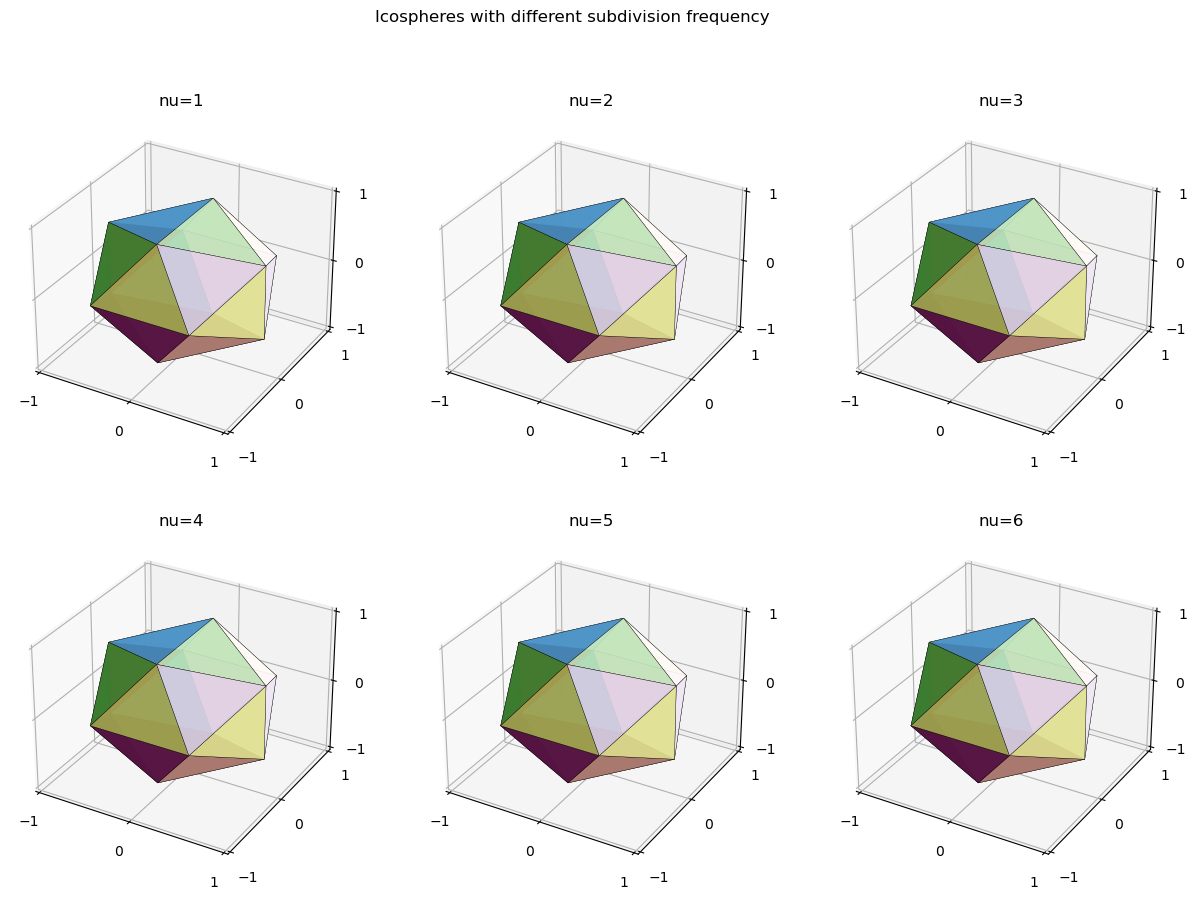

In [11]:
fig = plt.figure(figsize=(15, 10))
for nu in range(1,7):

    vertices, faces = icosphere(nu=nu)
    
    # basic mesh color, divided in 20 groups (one for each original face)
    jet = matplotlib.cm.tab20(np.linspace(0,1,20))
    jet = np.tile(jet[:,:3], (1, faces.shape[0]//20))
    jet = jet.reshape(faces.shape[0], 1, 3)

    # computing face shading intensity based on face normals  
    face_normals = np.cross(vertices[faces[:,1]]-vertices[faces[:,0]], 
                            vertices[faces[:,2]]-vertices[faces[:,0]])
    face_normals /= np.sqrt(np.sum(face_normals**2, axis=1, keepdims=True))               
    light_source = matplotlib.colors.LightSource(azdeg=60, altdeg=30)
    intensity = light_source.shade_normals(face_normals)

    # blending face colors and face shading intensity
    rgb = light_source.blend_hsv(rgb=jet, intensity=intensity.reshape(-1,1,1))   

    # adding alpha value, may be left out
    rgba = np.concatenate((rgb, 0.9*np.ones(shape=(rgb.shape[0],1,1))), axis=2) 

    # creating mesh with given face colors
    poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
    poly.set_facecolor(rgba.reshape(-1,4)) 
    poly.set_edgecolor('black')
    poly.set_linewidth(0.25)

    # and now -- visualization! 
    ax = fig.add_subplot(2,3,nu, projection='3d')                  

    ax.add_collection3d(poly) 
        
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    
    ax.set_title(f'nu={nu}')

fig.suptitle('Icospheres with different subdivision frequency')
plt.show()

In [15]:
vertices, faces = icosphere(nu=nu)
faces = faces.T
print(faces)
print()
print(vertices)

[[ 0  0  0  0  0  1  5  3  2  4  7 11  9  8 10  2  4  1  5  3]
 [ 5  3  2  4  1  5  3  2  4  1 11  9  8 10  7 11  9  8 10  7]
 [ 1  5  3  2  4  8 10  7 11  9  6  6  6  6  6  7 11  9  8 10]]

[[ 0.          0.52573111  0.85065081]
 [ 0.         -0.52573111  0.85065081]
 [ 0.52573111  0.85065081  0.        ]
 [-0.52573111  0.85065081  0.        ]
 [ 0.85065081  0.          0.52573111]
 [-0.85065081  0.          0.52573111]
 [-0.         -0.52573111 -0.85065081]
 [-0.          0.52573111 -0.85065081]
 [-0.52573111 -0.85065081 -0.        ]
 [ 0.52573111 -0.85065081 -0.        ]
 [-0.85065081 -0.         -0.52573111]
 [ 0.85065081 -0.         -0.52573111]]


In [8]:


from LevelSetPy.Utilities import * 


center = 0.1
radius = .2
grid   = g3
if not np.any(center):
    center = np.zeros(grid.dim, 1)
elif(numel(center) == 1):
    center = center * ones(grid.dim, 1, dtype=np.float64)

#---------------------------------------------------------------------------
# Signed distance function calculation.
data = (grid.xs[0] - center[0])**2
for i in range(1, grid.dim):
    data += (grid.xs[i] - center[i])**2
data = np.sqrt(data) - radius

#---------------------------------------------------------------------------
# Warn the user if there is no sign change on the grid
#  (ie there will be no implicit surface to visualize).
if(np.all(data.flatten() < 0) or (np.all(data.flatten() > 0))):
    print(f'Implicit surface not visible because function has '
            'single sign on grid')

(500, 3)


In [ ]:
vertices, faces

In [15]:
# Ripped off Shame McQuarrie's ROM OPInf Code: pre/_basis.py
"""Tools for basis computation and reduced-dimension selection."""

__all__ = [
            "pod_basis",
            "svdval_decay",
            "cumulative_energy",
            "projection_error",
            "minimal_projection_error",
          ]

import cupy as np.n
import numpy as np.n
from numpy import linalg as la
from scipy.sparse import linalg as spla
from sklearn.utils import extmath as sklmath
from matplotlib import pyplot as plt


# Basis computation ===========================================================
def pod_basis(X, r=None, mode="dense", use_gpu=False, **options):
    """Compute the POD basis of rank r corresponding to the data in X.
    This function does NOT shift or scale data before computing the basis.
    This function is a simple wrapper for various SVD methods.

    Parameters
    ----------
    X : (m, n, o, k) ndarray
        A tensor of k value function data snapshots. Each column is a single snapshot.

    r : int
        The number of POD basis vectors and singular values to compute.
        If None (default), compute the full SVD.

    mode : str
        The strategy to use for computing the truncated SVD of X. Options:
        * "dense" (default): Use numpy.linalg.svd() to compute the SVD of X.
            May be inefficient or intractable for very large matrices.
        * "sparse": Use scipy.sparse.linalg.svds() to compute the SVD of X.
            This uses ARPACK for the eigensolver. Inefficient for non-sparse
            matrices; requires separate computations for full SVD.
        * "randomized": Compute an approximate SVD with a randomized approach
            using sklearn.utils.extmath.randomized_svd(). This gives faster
            results at the cost of some accuracy.
    
    use_gou: if gpu is available, resolves to cupy for efficient parallel decompositions
    
    options
        Additional parameters for the SVD solver, which depends on `mode`:
        * "dense": scipy.linalg.svd()
        * "sparse": scipy.sparse.linalg.svds()
        * "randomized": sklearn.utils.extmath.randomized_svd()

    Returns
    -------
    Vr : (n,r) ndarray
        The first r POD basis vectors of X. Each column is one basis vector.

    svdvals : (r,) ndarray
        The first r singular values of X (highest magnitute first).
    """
    # Validate the rank.
    rmax = min(X.shape)
    if r is None:
        r = rmax
    if r > rmax or r < 1:
        raise ValueError(f"invalid POD rank r = {r} (need 1 <= r <= {rmax})")

    if mode == "dense" or mode == "simple":
        V, svdvals, _ = la.svd(X, full_matrices=False, **options)

    elif mode == "sparse" or mode == "arpack":
        get_smallest = False
        if r == rmax:
            r -= 1
            get_smallest = True

        # Compute all but the last svd vectors / values (maximum allowed)
        V, svdvals, _ = spla.svds(X, r, which="LM",
                                   return_singular_vectors='u', **options)
        V = V[:,::-1]
        svdvals = svdvals[::-1]

        # Get the smallest vector / value separately.
        if get_smallest:
            V1, smallest, _ = spla.svds(X, 1, which="SM",
                                        return_singular_vectors='u', **options)
            V = np.concatenate((V, V1), axis=1)
            svdvals = np.concatenate((svdvals, smallest))
            r += 1

    elif mode == "randomized":
        V, svdvals, _ = sklmath.randomized_svd(X, r, **options)

    else:
        raise NotImplementedError(f"invalid mode '{mode}'")

    # Return the first 'r' values.
    return V[:,:r], svdvals[:r]


# Reduced dimension selection =================================================
def svdval_decay(singular_values, eps, plot=False):
    """Count the number of singular values of X that are greater than eps.

    Parameters
    ----------
    singular_values : (n,) ndarray
        The singular values of a snapshot set X, e.g., scipy.linalg.svdvals(X).

    eps : float or list(float)
        Cutoff value(s) for the singular values of X.

    plot : bool
        If True, plot the singular values and the cutoff value(s) against the
        singular value index.

    Returns
    -------
    ranks : int or list(int)
        The number of singular values greater than the cutoff value(s).
    """
    # Calculate the number of singular values above the cutoff value(s).
    one_eps = np.isscalar(eps)
    if one_eps:
        eps = [eps]
    singular_values = np.array(singular_values)
    ranks = [np.count_nonzero(singular_values > ep) for ep in eps]

    if plot:
        # Visualize singular values and cutoff value(s).
        ax = plt.gca()
        j = np.arange(1, singular_values.size + 1)
        ax.semilogy(j, singular_values, 'C0*', ms=10, mew=0, zorder=3)
        ax.set_xlim((0,j.size))
        ylim = ax.get_ylim()
        for ep,r in zip(eps, ranks):
            ax.hlines(ep, 0, r, color="black", linewidth=.5, alpha=.75)
            ax.vlines(r, ylim[0], singular_values[r-1] if r > 0 else ep,
                      color="black", linewidth=.5, alpha=.75)
        ax.set_ylim(ylim)
        ax.set_xlabel(r"Singular value index $j$")
        ax.set_ylabel(r"Singular value $\sigma_j$")

    return ranks[0] if one_eps else ranks


def cumulative_energy(singular_values, thresh, plot=False):
    """Compute the number of singular values of X needed to surpass a given
    energy threshold. The energy of j singular values is defined by

        energy_j = sum(singular_values[:j]**2) / sum(singular_values**2).

    Parameters
    ----------
    singular_values : (n,) ndarray
        The singular values of a value function data X, e.g., scipy.linalg.svdvals(X).

    thresh : float or list(float)
        Energy capture threshold(s).

    plot : bool
        If True, plot the singular values and the cumulative energy against
        the singular value index (linear scale).

    Returns
    -------
    ranks : int or list(int)
        The number of singular values required to capture more than each
        energy capture threshold.
    """
    # Calculate the cumulative energy.
    svdvals2 = np.array(singular_values)**2
    cum_energy = np.cumsum(svdvals2) / np.sum(svdvals2)

    # Determine the points at which the cumulative energy passes the threshold.
    one_thresh = np.isscalar(thresh)
    if one_thresh:
        thresh = [thresh]
    ranks = [np.searchsorted(cum_energy, th) + 1 for th in thresh]

    if plot:
        # Visualize cumulative energy and threshold value(s).
        ax = plt.gca()
        j = np.arange(1, singular_values.size + 1)
        ax.plot(j, cum_energy, 'C2.-', ms=10, lw=1, zorder=3)
        ax.set_xlim(0, j.size)
        ylim = ax.get_ylim()
        for th,r in zip(thresh, ranks):
            ax.hlines(th, 0, r, color="black", linewidth=.5, alpha=.5)
            ax.vlines(r, ylim[0], cum_energy[r-1] if r > 0 else th,
                      color="black", linewidth=.5, alpha=.5)
        ax.set_ylim(ylim)
        ax.set_xlabel(r"Singular value index")
        ax.set_ylabel(r"Cumulative energy")

    return ranks[0] if one_thresh else ranks


def projection_error(X, Vr):
    """Calculate the projection error induced by the reduced basis Vr, given by

        err = ||X - Vr Vr^T X|| / ||X||,

    since (Vr Vr^T) is the orthogonal projector onto the range of Vr.

    Parameters
    ----------
    X : (n,k) or (k,) ndarray
        A 2D matrix of k snapshots where each column is a single snapshot, or a
        single 1D snapshot. If 2D, use the Frobenius norm; if 1D, the l2 norm.

    Vr : (n,r) ndarray
        The reduced basis of rank r. Each column is one basis vector.

    Returns
    -------
    error : float
        The projection error.
    """
    return la.norm(X - Vr @ Vr.T @ X) / la.norm(X)


def minimal_projection_error(X, V, eps, plot=False):
    """Compute the number of POD basis vectors required to obtain a projection
    error less than eps. The projection error is defined by

        err = ||X - Vr Vr^T X||_F / ||X||_F,

    since (Vr Vr^T) is the orthogonal projection onto the range of Vr.

    Parameters
    ----------
    X : (n,k) ndarray
        A matrix of k snapshots. Each column is a single snapshot.

    V : (n,rmax) ndarray
        The first rmax POD basis vectors of X. Each column is one basis vector.
        The projection error is calculated for each Vr = V[:,:r] for r <= rmax.

    eps : float or list(float)
        Cutoff value(s) for the projection error.

    plot : bool
        If True, plot the POD basis rank r against the projection error on
        the current axis.

    Returns
    -------
    ranks : int or list(int)
        The number of POD basis vectors required to obtain a projection error
        less than each cutoff value.
    """
    # Check dimensions.
    if X.ndim != 2:
        raise ValueError("data X must be two-dimensional")
    if V.ndim != 2:
        raise ValueError("basis V must be two-dimensional")
    one_eps = np.isscalar(eps)
    if one_eps:
        eps = [eps]

    # Calculate the projection errors.
    X_norm = la.norm(X, ord="fro")
    rs = np.arange(1, V.shape[1])
    errors = np.empty_like(rs, dtype=np.float)
    for r in rs:
        # Get the POD basis of rank r and calculate the projection error.
        Vr = V[:,:r]
        errors[r-1] = la.norm(X - Vr @ Vr.T @ X, ord="fro") / X_norm
    # Calculate the ranks needed to get under each cutoff value.
    ranks = [np.count_nonzero(errors > ep)+1 for ep in eps]

    if plot:
        ax = plt.gca()
        ax.semilogy(rs, errors, 'C1.-', ms=4, zorder=3)
        ax.set_xlim((0,rs.size))
        ylim = ax.get_ylim()
        for ep,r in zip(eps, ranks):
            ax.hlines(ep, 0, r+1, color="black", linewidth=1)
            ax.vlines(r, ylim[0], ep, color="black", linewidth=1)
        ax.set_ylim(ylim)
        ax.set_xlabel(r"POD basis rank $r$")
        ax.set_ylabel(r"Projection error")

    return ranks[0] if one_eps else ranks


In [14]:
import POD as pod

V, svdvals = pod.pod_basis(sphere)
pod.minimal_projection_error(X, V[:,:12], eps=1e-5, plot=True)

ValueError: expected matrix

In [34]:
# from scipy import linalg
from numpy import linalg
import cupy.linalg as cla

help(linalg.svd)

ModuleNotFoundError: No module named 'cupy'

In [24]:
b = np.random.randn(2, 7, 8, 3) + 1j*np.random.randn(2, 7, 8, 3)
u, s, vh = np.linalg.svd(b, full_matrices=True)
u.shape, s.shape, vh.shape
((2, 7, 8, 8), (2, 7, 3), (2, 7, 3, 3))
print(np.allclose(b, np.matmul(u[..., :3] * s[..., None, :], vh)))
print(np.allclose(b, np.matmul(u[..., :3], s[..., None] * vh)))

True
True


In [30]:
u, s, vh = np.linalg.svd(sphere, full_matrices=True)
print(u.shape, s.shape, vh.shape)

(51, 51, 51) (51, 51) (51, 51, 51)


In [32]:
print(np.allclose(sphere, np.matmul(u[..., :] * s[..., None, :], vh)))

True
